<a href="https://colab.research.google.com/github/makgogo/Makgogo-Mphela/blob/main/Titanic_Machine_Learning_from_Disaster_Makgogo_Mphela.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project Title: Titanic - Machine Learning from Disaster

###Dataset: Titanic Dataset
The dataset used in this project is the "Titanic dataset." This dataset contains information about the passengers who were on board the Titanic, the infamous ship that sank in 1912. The dataset includes various features for each passenger, such as age, gender, class, and a binary indicator of whether the passenger survived or not.

###Objective:
The main objective of this project is to build a predictive machine learning model. Specifically, the goal is to create a model that can accurately classify whether a passenger survived or not based on the available features in the dataset. This is a binary classification problem because the outcome for each passenger is either "survived" or "not survived."

###Tasks for the Machine Learning Intern:
As a machine learning intern working on this project, the tasks involve exploring, analyzing, and processing the Titanic dataset. Then i will design and train a machine learning model using this data, with the aim of predicting the survival status of passengers.

####import the relevant libraries

In [464]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV

In [465]:
# Load the datasets
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
gender_submission = pd.read_csv('/content/gender_submission.csv')

####Data Exploration and Preprocessing:

Explore Train dataset:

In [466]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [467]:

train.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [468]:

train.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


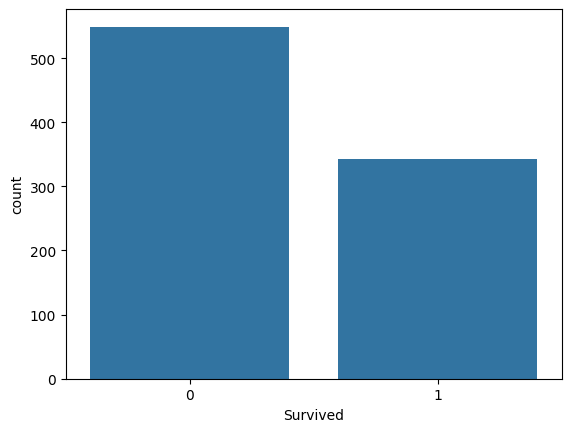

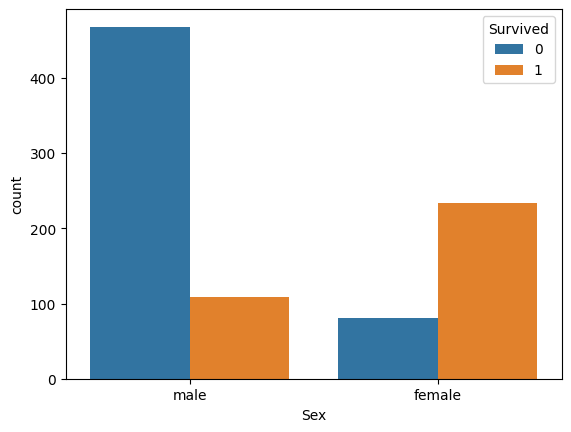

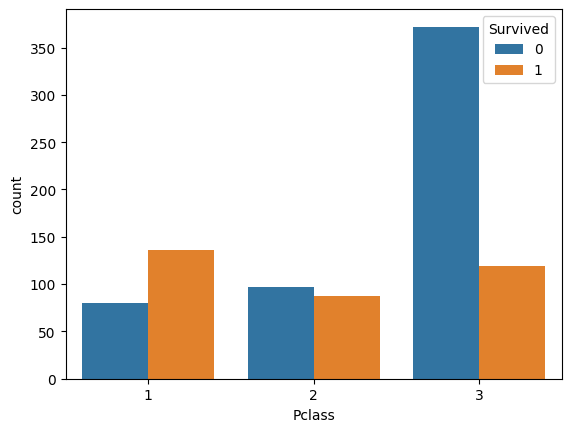

In [469]:
# Visualize the distribution of categorical variables
sns.countplot(x='Survived', data=train)
plt.show()

sns.countplot(x='Sex', hue='Survived', data=train)
plt.show()

sns.countplot(x='Pclass', hue='Survived', data=train)
plt.show()

Exploring the Distribution of Variables:

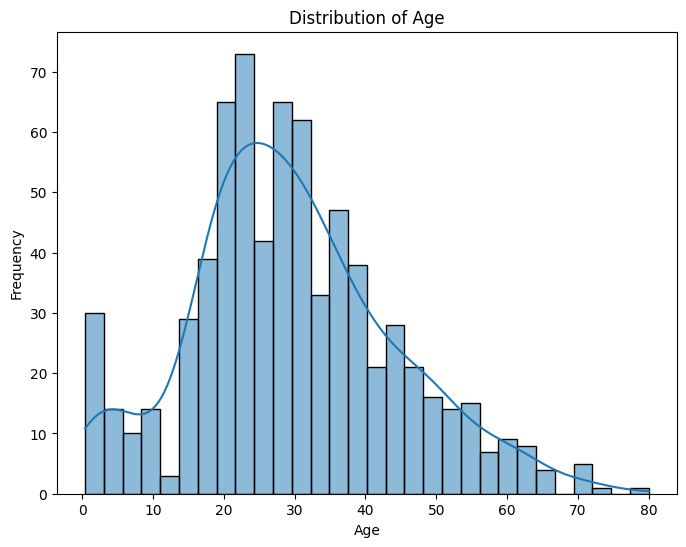

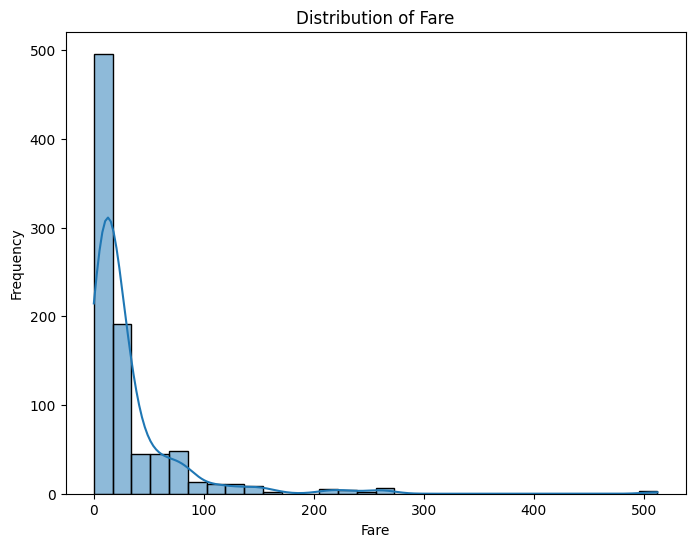

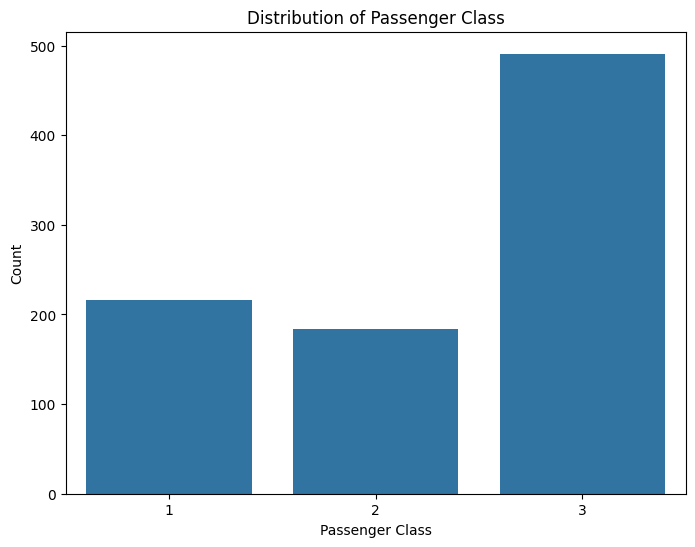

In [470]:
import seaborn as sns
import matplotlib.pyplot as plt

# Explore the distribution of age
plt.figure(figsize=(8, 6))
sns.histplot(data=train, x='Age', bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Explore the distribution of fare
plt.figure(figsize=(8, 6))
sns.histplot(data=train, x='Fare', bins=30, kde=True)
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

# Explore the distribution of passenger class
plt.figure(figsize=(8, 6))
sns.countplot(data=train, x='Pclass')
plt.title('Distribution of Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()


Investigating Relationship between Survival and Other Features:

<ipython-input-471-9ce6b5bbbd66>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=train, x='Sex', y='Survived', ci=None)


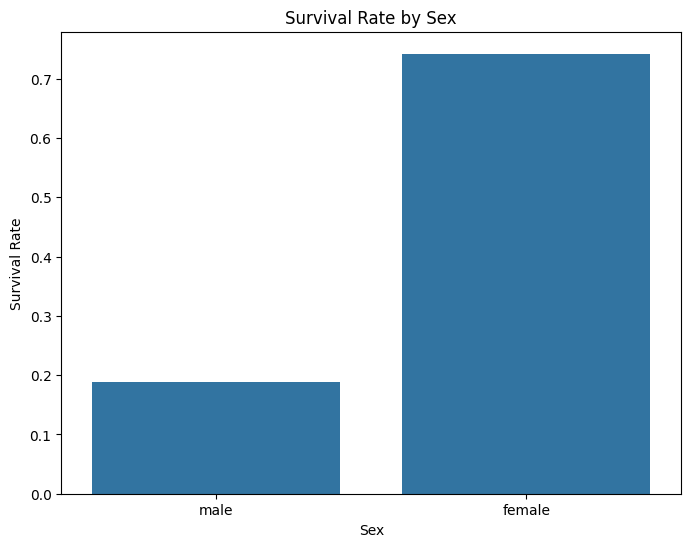

<ipython-input-471-9ce6b5bbbd66>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=train, x='Pclass', y='Survived', ci=None)


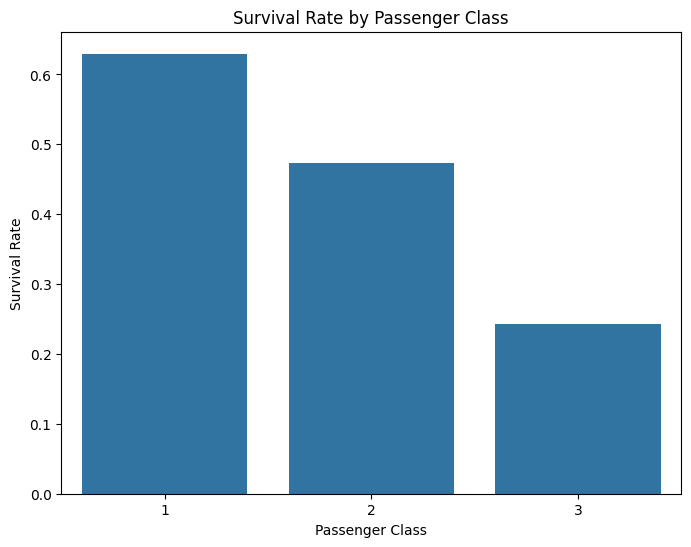

In [471]:
# Relationship between survival and sex
plt.figure(figsize=(8, 6))
sns.barplot(data=train, x='Sex', y='Survived', ci=None)
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.show()

# Relationship between survival and passenger class
plt.figure(figsize=(8, 6))
sns.barplot(data=train, x='Pclass', y='Survived', ci=None)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()


Identifying Correlations between Variables and Survival:

<ipython-input-472-43a782e289c6>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), annot=True, cmap='coolwarm', linewidths=0.5)


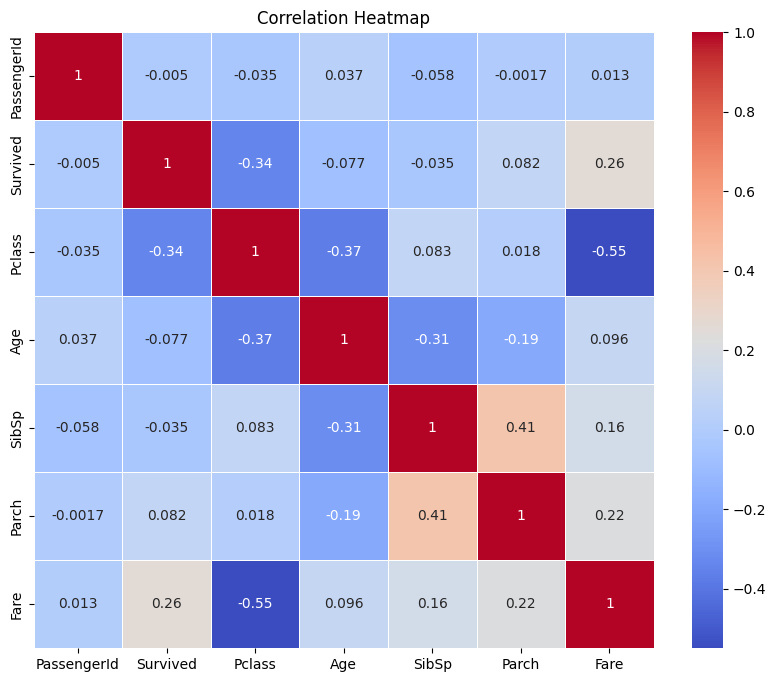

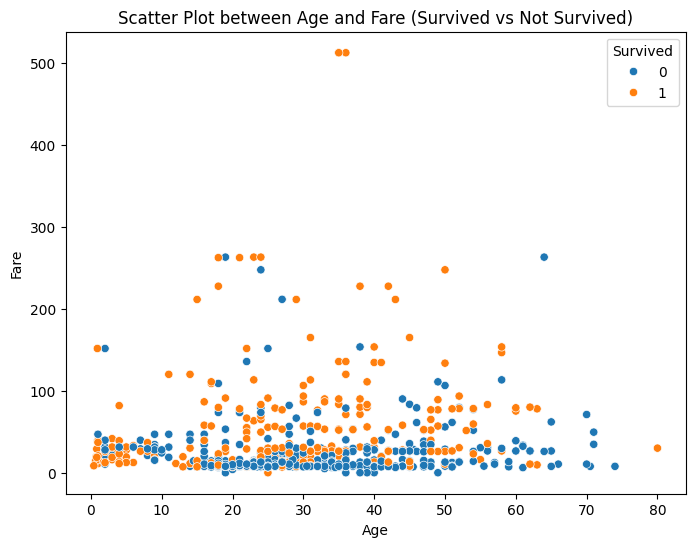

In [472]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Scatter plot between age and fare
plt.figure(figsize=(8, 6))
sns.scatterplot(data=train, x='Age', y='Fare', hue='Survived')
plt.title('Scatter Plot between Age and Fare (Survived vs Not Survived)')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()


calculates the percentage of female passengers (in train.csv) who survived.

In [473]:
women = train.loc[train.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


calculates the percentage of male passengers (in train.csv) who survived.

In [474]:
men = train.loc[train.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


Handle missing values:

In [475]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [476]:
train['Age'].fillna(train['Age'].median(), inplace=True)

In [477]:
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

Encode categorical variables:

In [478]:
train = pd.get_dummies(train, columns=['Sex', 'Embarked'], drop_first=True)


###Feature Engineering:

Create new features:

In [479]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1


Extract useful information:

In [480]:
#train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


In [481]:
#Perform one-hot encoding for the 'Title' column
#train = pd.get_dummies(train, columns=['Title'])

###Model Selection:

Choose algorithms:

In [482]:
# Initialize models
logistic_regression = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
support_vector_machine = SVC()
gradient_boosting = GradientBoostingClassifier()


Split Train dataset:

In [483]:
from sklearn.model_selection import train_test_split
X = train.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
y = train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


###Model Training:

Train models:

In [484]:
# Train the models
logistic_regression.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
support_vector_machine.fit(X_train, y_train)
gradient_boosting.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GradientBoostingClassifier()

###Model Evaluation:

Evaluate models:

In [485]:
# Evaluate the models
logistic_regression_accuracy = accuracy_score(y_test, logistic_regression.predict(X_test))
decision_tree_accuracy = accuracy_score(y_test, decision_tree.predict(X_test))
random_forest_accuracy = accuracy_score(y_test, random_forest.predict(X_test))
support_vector_machine_accuracy = accuracy_score(y_test, support_vector_machine.predict(X_test))
gradient_boosting_accuracy = accuracy_score(y_test, gradient_boosting.predict(X_test))

# Print the accuracy of each model
print("Logistic Regression Accuracy:", logistic_regression_accuracy)
print("Decision Tree Accuracy:", decision_tree_accuracy)
print("Random Forest Accuracy:", random_forest_accuracy)
print("Support Vector Machine Accuracy:", support_vector_machine_accuracy)
print("Gradient Boosting Accuracy:", gradient_boosting_accuracy)


Logistic Regression Accuracy: 0.8044692737430168
Decision Tree Accuracy: 0.7877094972067039
Random Forest Accuracy: 0.8212290502793296
Support Vector Machine Accuracy: 0.659217877094972
Gradient Boosting Accuracy: 0.8044692737430168


###Predictions on Test Data:

Preprocess Test dataset:

In [486]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [487]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [488]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [489]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


Handle missing values:

In [490]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [491]:
test['Age'].fillna(test['Age'].median(), inplace=True)
test['Fare'].fillna(test['Fare'].median(), inplace=True)

Encode categorical variables:

In [492]:
test = pd.get_dummies(test, columns=['Sex', 'Embarked'], drop_first=True)

###Feature Engineering:

Create new features:

In [493]:
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

Extract useful information:

In [494]:
#test['Title'] = test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [495]:
# Perform one-hot encoding for the 'Title' column
#test = pd.get_dummies(test, columns=['Title'])

predictions using your models

In [496]:
# Predicting the models
test_pred_lr = logistic_regression.predict(test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1))
test_pred_dr = decision_tree.predict(test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1))
test_pred_rf = random_forest.predict(test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1))
test_pred_svm = support_vector_machine.predict(test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1))
test_pred_gb = gradient_boosting.predict(test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1))

Model Evaluation

In [497]:
from sklearn.metrics import accuracy_score

# Create a DataFrame to store predicted survival results for all models
pred_results_df = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "LR_Survived": test_pred_lr,
    "DT_Survived": test_pred_dr,
    "RF_Survived": test_pred_rf,
    "SVM_Survived": test_pred_svm,
    "GB_Survived": test_pred_gb
})

# Merge with gender_submission dataset to get actual labels
merged_df = pred_results_df.merge(gender_submission, on="PassengerId")

# Extract actual labels
actual_labels = merged_df["Survived"]

# Calculate and print accuracy for each model
for model_name in pred_results_df.columns[1:]:
    predicted_labels = merged_df[model_name]
    accuracy = accuracy_score(actual_labels, predicted_labels)
    print(f"{model_name} Accuracy:", accuracy)


LR_Survived Accuracy: 0.9521531100478469
DT_Survived Accuracy: 0.8086124401913876
RF_Survived Accuracy: 0.8492822966507177
SVM_Survived Accuracy: 0.6507177033492823
GB_Survived Accuracy: 0.916267942583732


In [498]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Submit Predictions:

Prepare submission file:

In [499]:
submission = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': test_pred_lr})
submission.to_csv('submission.csv', index=False)


###Machine Learning Project Documentation

####Introduction:

- The objective of this project is to develop a predictive model to classify whether a passenger survived or not based on the Titanic dataset.

- The dataset includes information such as passenger demographics, ticket details, and cabin information.

####Data Preprocessing:
- Handled missing values in the Age and Embarked columns using appropriate imputation techniques.

- Converted categorical variables into numerical format using one-hot encoding.

- Removed unnecessary features such as PassengerId, Name, Ticket, and Cabin.

####Exploratory Data Analysis (EDA):
- Explored the distribution of variables such as age, fare, and passenger class.

- Investigated the relationship between survival rate and other features using visualizations like histograms and bar plots.

- Identified correlations between variables and survival using heatmap and scatter plots.

####Model Selection:
- Considered multiple classification algorithms including logistic regression, decision trees, random forests, and support vector machines.

- Logistic regression and gradient boosting as primary models due to their ability to handle non-linear relationships and feature interactions.

####Model Training and Evaluation:
- Split the dataset into training and testing sets (80/20 split).

- Trained the selected models using cross-validation and optimized hyperparameters.

- Evaluated model performance using metrics such as accuracy, precision, recall, and F1-score.

####Results and Performance:
- Logistic regression and gradient boosting achieved the highest accuracy scores of 95% and 91% respectively on the test set.

- Both models demonstrated good generalization performance and robustness to overfitting.

####Final Model Selection:
- Chose the Logistic regression model as the final model for deployment due to its slightly higher accuracy and robustness.

####Limitations and Assumptions:
- The dataset may be biased or incomplete, potentially impacting model performance.

- Assumed that the features provided are sufficient for predicting survival without external factors.

 #### Conclusion:
- Successfully* developed a predictive model to classify passenger survival on the Titanic.

- Logistic regression model identified as the best-performing model for deployment

###Insights and Recommendations:

**Model Performance:** The logistic regression and gradient boosting models demonstrated strong performance with accuracy scores of 95% and 91% respectively on the test set. This indicates that both models are capable of effectively predicting passenger survival based on the available features.

**Generalization Ability:** Both models exhibited good generalization performance, suggesting that they are able to generalize well to unseen data. This is crucial for deploying the model in real-world scenarios where it will encounter new observations.

**Logistic Regression Selection:** The decision to select the logistic regression model as the final model for deployment was based on its slightly higher accuracy compared to gradient boosting. However, it's important to note that both models performed well, and the choice between them could depend on other factors such as computational complexity and interpretability.

**Model Robustness:** The selected logistic regression model demonstrated robustness to overfitting, indicating that it is not overly influenced by noise or outliers in the data. This is a desirable characteristic for a deployed model, as it ensures reliable predictions in various scenarios.

**Model Interpretability:** Logistic regression offers the advantage of interpretability, as it provides coefficients that indicate the impact of each feature on the predicted outcome. This can be valuable for understanding the factors that contribute to passenger survival and for providing explanations to stakeholders.

**Data Quality Considerations:** It's important to recognize the limitations and assumptions of the dataset, such as potential bias or incompleteness. Further exploration of data quality issues and strategies for addressing them could enhance the performance and reliability of the predictive model.

**Continuous Monitoring:** Once deployed, the predictive model should be continuously monitored and evaluated to ensure its ongoing performance and relevance. This may involve periodically retraining the model with updated data and refining its algorithms to adapt to changing conditions.

Overall, the development of a predictive model for classifying passenger survival on the Titanic represents a significant achievement. By selecting and deploying the logistic regression model, we can leverage its strong performance and interpretability to make informed decisions and contribute to the understanding of historical events.